In [1]:
pip install xlrd


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

df = pd.read_csv("../Data/Credit Card Customer Data.csv")
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [ ]:
#Data Cleaning
#Drop Kolom ID
df_clean = df.drop(columns=["Sl_No", "Customer Key"])
df_clean.head()


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [6]:
#Cek Missing Value
df_clean.isnull().sum()


Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [7]:
df_clean = df_clean.fillna(df_clean.median())


In [8]:
#cek Tipe Data
df_clean.dtypes


Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [9]:
#cek outlier
df_clean.describe()


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


In [ ]:
#Simpan Clean Dataset
df_clean.to_csv("../Data/credit_card_clean.csv", index=False)


In [11]:
#stastistik dasar
df_clean.describe()


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


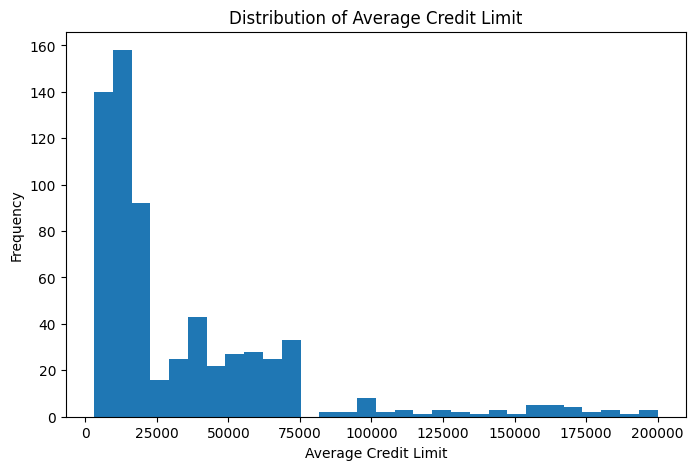

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df_clean["Avg_Credit_Limit"], bins=30)
plt.title("Distribution of Average Credit Limit")
plt.xlabel("Average Credit Limit")
plt.ylabel("Frequency")
plt.show()


In [13]:
df_clean.columns


Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

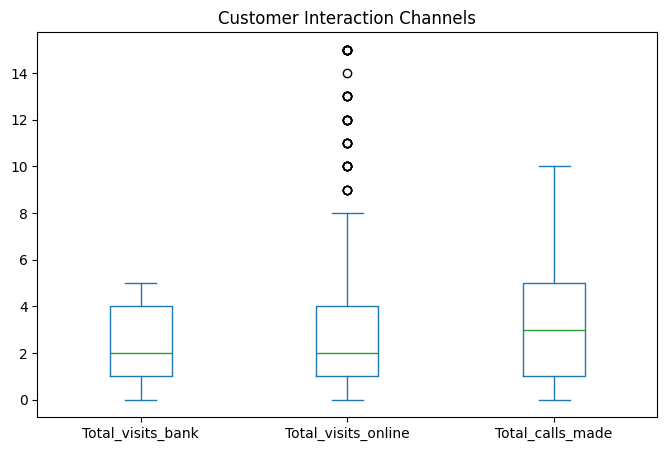

In [15]:
df_clean[[
    "Total_visits_bank",
    "Total_visits_online",
    "Total_calls_made"
]].plot(kind="box", figsize=(8,5))

plt.title("Customer Interaction Channels")
plt.show()


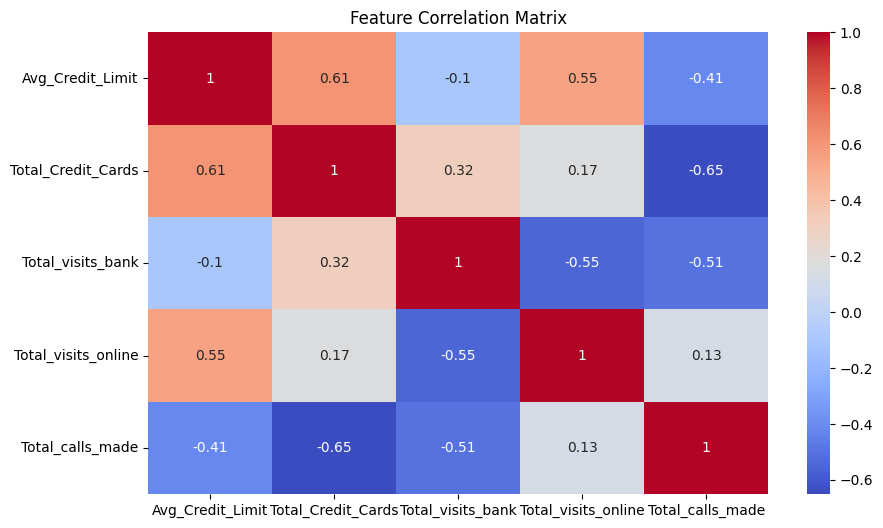

In [16]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df_clean.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


In [17]:
#feature engineering
df_clean["Total_Interaction"] = (
    df_clean["Total_visits_bank"] +
    df_clean["Total_visits_online"] +
    df_clean["Total_calls_made"]
)


In [18]:
df_clean.head()


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Total_Interaction
0,100000,2,1,1,0,2
1,50000,3,0,10,9,19
2,50000,7,1,3,4,8
3,30000,5,1,1,4,6
4,100000,6,0,12,3,15


In [19]:
df_clean["Online_Ratio"] = (
    df_clean["Total_visits_online"] /
    (df_clean["Total_Interaction"] + 1)
)


In [20]:
df_clean["Credit_Intensity"] = (
    df_clean["Avg_Credit_Limit"] /
    (df_clean["Total_Credit_Cards"] + 1)
)


In [21]:
df_clean.describe()


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Total_Interaction,Online_Ratio,Credit_Intensity
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333,8.592424,0.232279,5599.507193
std,37625.487804,2.167835,1.631813,2.935724,2.865317,3.407873,0.204637,4369.958398
min,3000.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,600.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000,6.000000,0.111111,2393.750000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000,8.000000,0.214286,4333.333333
75%,48000.000000,6.000000,4.000000,4.000000,5.000000,11.000000,0.307692,7770.833333
max,200000.000000,10.000000,5.000000,15.000000,10.000000,19.000000,0.937500,33333.333333


In [22]:
df_clean.to_csv("../Data/credit_card_features.csv", index=False)


In [24]:
#FEATURE SCALING
features = [
    "Avg_Credit_Limit",
    "Total_Credit_Cards",
    "Total_visits_bank",
    "Total_visits_online",
    "Total_calls_made",
    "Total_Interaction",
    "Online_Ratio",
    "Credit_Intensity"
]

X = df_clean[features]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [25]:
X_scaled.shape


(660, 8)

In [26]:
import numpy as np
np.save("../Data/X_scaled.npy", X_scaled)


<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

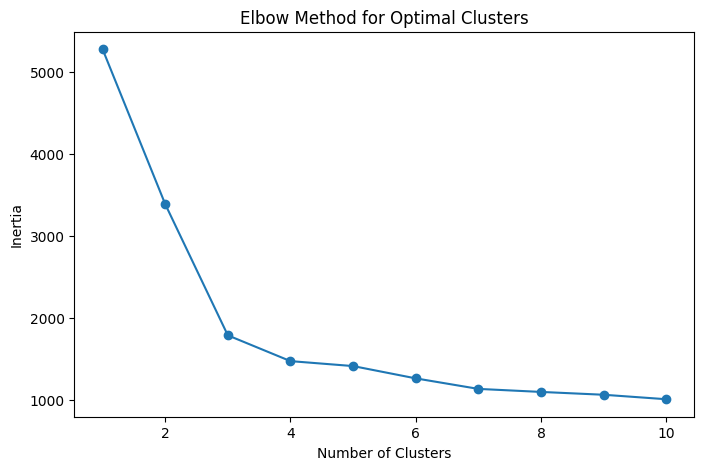

In [28]:
#K-MEANS CLUSTERING
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    plt.figure(figsize=(8,5))
plt.plot(range(1,11), inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()



In [30]:
kmeans = KMeans(n_clusters=4, random_state=42)
df_clean["Cluster"] = kmeans.fit_predict(X_scaled)
df_clean["Cluster"].value_counts()



Cluster
0    234
2    222
3    154
1     50
Name: count, dtype: int64

In [31]:
cluster_summary = df_clean.groupby("Cluster")[features].mean()
cluster_summary


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Total_Interaction,Online_Ratio,Credit_Intensity
Cluster,,,,,,,,
0,18188.034188,5.602564,3.628205,0.991453,2.000000,6.619658,0.125033,2769.581807
1,141040.000000,8.740000,0.600000,10.900000,1.080000,12.580000,0.797271,14779.709235
2,12184.684685,2.400901,0.932432,3.572072,6.909910,11.414414,0.288931,3952.702703
3,57181.818182,5.357143,3.246753,0.974026,2.006494,6.227273,0.130130,9292.903525


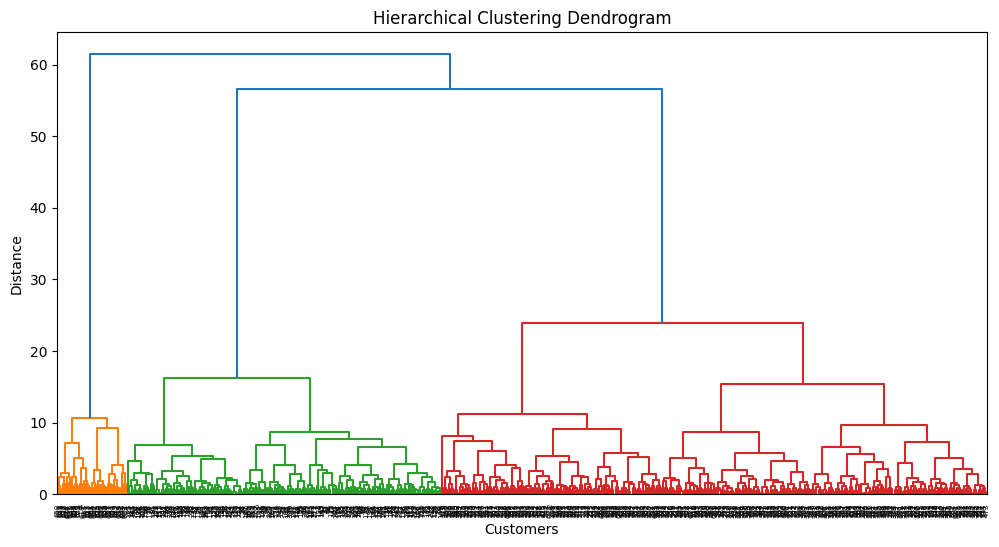

In [32]:
#HIERARCHICAL CLUSTERING
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
linked = linkage(X_scaled, method="ward")
plt.figure(figsize=(12,6))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()


In [33]:
from scipy.cluster.hierarchy import fcluster

df_clean["H_Cluster"] = fcluster(
    linked,
    t=4,
    criterion="maxclust"
)
df_clean["H_Cluster"].value_counts()


H_Cluster
4    231
2    223
3    156
1     50
Name: count, dtype: int64

In [34]:
pd.crosstab(df_clean["Cluster"], df_clean["H_Cluster"])


H_Cluster,1,2,3,4
Cluster,,,,
0,0,1,18,215
1,50,0,0,0
2,0,222,0,0
3,0,0,138,16


In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_clean["PCA1"] = X_pca[:, 0]
df_clean["PCA2"] = X_pca[:, 1]
pca.explained_variance_ratio_



array([0.43453678, 0.34602673])

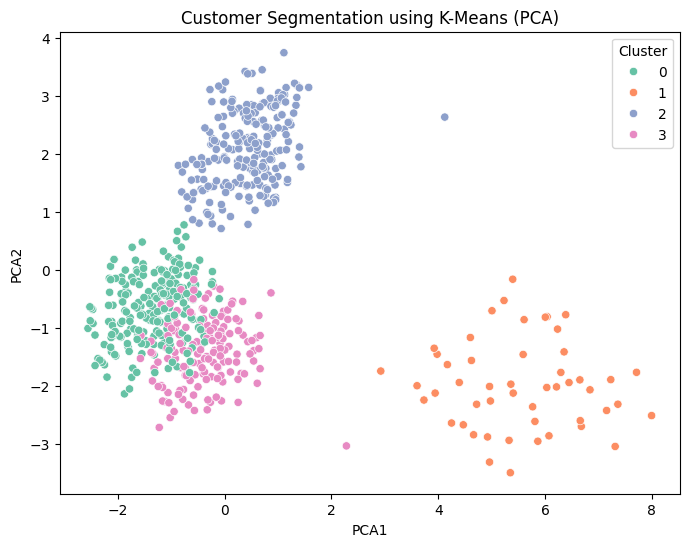

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(
    x="PCA1",
    y="PCA2",
    hue="Cluster",
    data=df_clean,
    palette="Set2"
)
plt.title("Customer Segmentation using K-Means (PCA)")
plt.show()


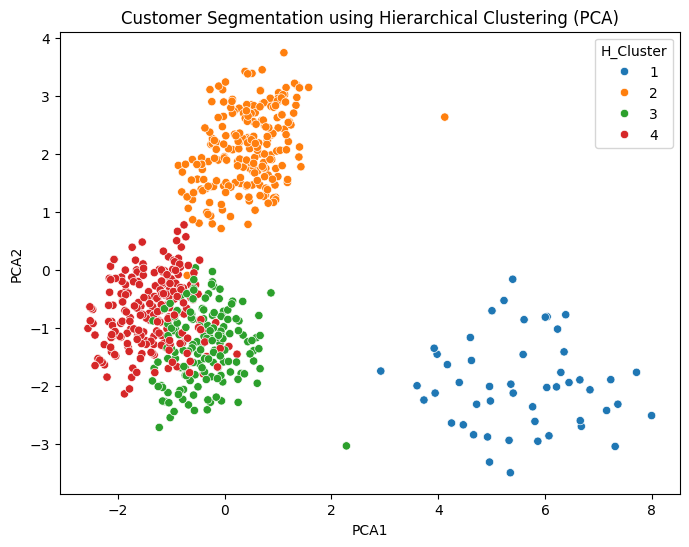

In [39]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="PCA1",
    y="PCA2",
    hue="H_Cluster",
    data=df_clean,
    palette="tab10"
)
plt.title("Customer Segmentation using Hierarchical Clustering (PCA)")
plt.show()


In [40]:
cluster_profile = df_clean.groupby("Cluster").mean()
cluster_profile


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Total_Interaction,Online_Ratio,Credit_Intensity,H_Cluster,PCA1,PCA2
Cluster,,,,,,,,,,,
0,18188.034188,5.602564,3.628205,0.991453,2.000000,6.619658,0.125033,2769.581807,3.914530,-1.343492,-0.663226
1,141040.000000,8.740000,0.600000,10.900000,1.080000,12.580000,0.797271,14779.709235,1.000000,5.543213,-1.972585
2,12184.684685,2.400901,0.932432,3.572072,6.909910,11.414414,0.288931,3952.702703,2.000000,0.435231,2.106224
3,57181.818182,5.357143,3.246753,0.974026,2.006494,6.227273,0.130130,9292.903525,3.103896,-0.385745,-1.388036


In [42]:
df_clean["Loyalty_Score"] = (
    df_clean["Avg_Credit_Limit"] * 0.4 +
    df_clean["Total_Interaction"] * 0.4 +
    df_clean["Credit_Intensity"] * 0.2
)
df_clean.groupby("Cluster")["Loyalty_Score"].mean().sort_values(ascending=False)



Cluster
1    59376.973847
3    24733.798887
0     7831.777900
2     5668.980180
Name: Loyalty_Score, dtype: float64

In [44]:
threshold = df_clean["Loyalty_Score"].quantile(0.75)

df_clean["Is_Loyal"] = df_clean["Loyalty_Score"] >= threshold
df_clean["Is_Loyal"].value_counts()



Is_Loyal
False    495
True     165
Name: count, dtype: int64

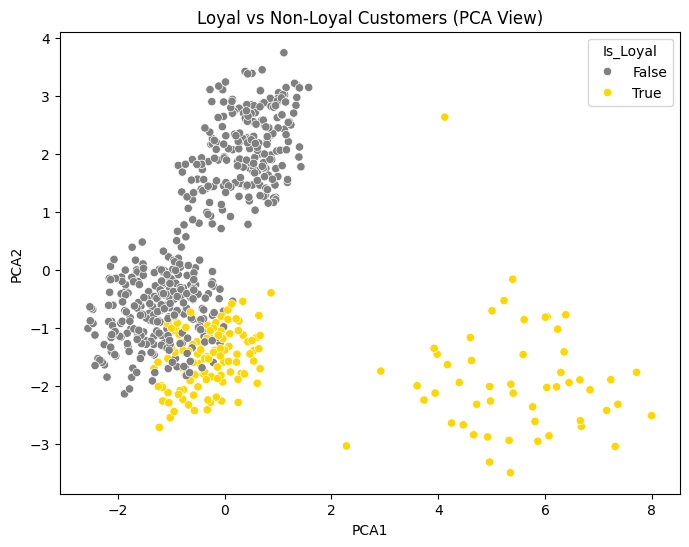

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(
    x="PCA1",
    y="PCA2",
    hue="Is_Loyal",
    data=df_clean,
    palette=["gray", "gold"]
)
plt.title("Loyal vs Non-Loyal Customers (PCA View)")
plt.show()
